In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime




In [ ]:
#Load Dataset
data_df=pd.read_csv('/content/COVID clinical trials.csv')

In [ ]:
#Dispaly first five rows
print("\nFirst 5 rows of the dataset:")
data_df.head(5)

In [ ]:
#Get the no. of rows and columns of Dataset
print("\nShape of dataset:")
data_df.shape


Shape of dataset:


(5783, 27)

In [ ]:
#Get basic dataset information
print("Dataset Info:")
data_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys

In [ ]:
#Basic Description of numeric values
data_df.describe()

In [ ]:
#Basic description of non-numeric values
data_df.describe(include='object')

In [ ]:
#Check for missing values
print("\nMissing Values per Column:")
print(data_df.isnull().sum())

In [ ]:
missing_data = data_df.isnull().mean() * 100
missing_data

,0
Rank,0.000000
NCT Number,0.000000
Title,0.000000
Acronym,57.115684
Status,0.000000
Study Results,0.000000
Conditions,0.000000
Interventions,15.320768
Outcome Measures,0.605222
Sponsor/Collaborators,0.000000


In [ ]:
# Visualize data without calculating
def visualize_data(data , caption = '' , ylabel = 'Percentage of Missing Data'):
  # set figure size
  sns.set(rc={'figure.figsize':(12,5)})
  # make ticks vertical
  plt.xticks(rotation=90)
  # set title to the image and plot it or the highest 40
  fig = sns.barplot(x = data.keys()[:min(40 ,
len(data))].tolist() , y = data.values[: min(40 ,
len(data))].tolist()) \
.set_title(caption)
  # set labels
  plt.ylabel(ylabel)
  plt.show()



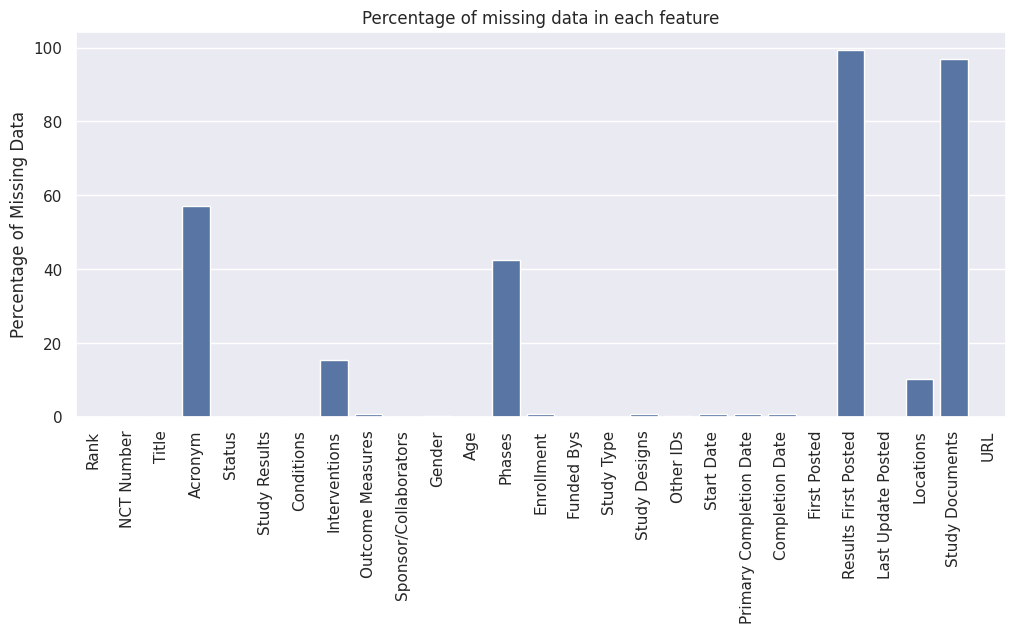

In [ ]:
visualize_data(missing_data , 'Percentage of missing data in each feature')

As shown the percentae of missing data in Results First Posted is 99.3% and
Study Documents is 96.8%, so it's impossible to impute them without destoying our
dataset.

In [ ]:
covid_df = data_df.drop(columns=['Acronym',  'URL', 'Study Documents', 'Results First Posted']) # Example of dropping columns

In [ ]:
# Convert date columns to datetime format
date_columns = ["Start Date", "Primary Completion Date", "Completion Date", "First Posted", "Last Update Posted"]
for col in date_columns:
    covid_df[col] = pd.to_datetime(covid_df[col], errors='coerce')

# Extract country information from Locations column
covid_df["Country"] = covid_df["Locations"].str.extract(r'([A-Za-z ]+)$')

covid_df.info()




## **Univariate Analysis**

---



1️⃣ Distribution of Study Phases
Analyze the distribution of clinical trials across different study phases (Phase 1, Phase 2, etc.).

<ipython-input-38-747555ad6f19>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=phase_counts.index, x=phase_counts.values, palette="magma")


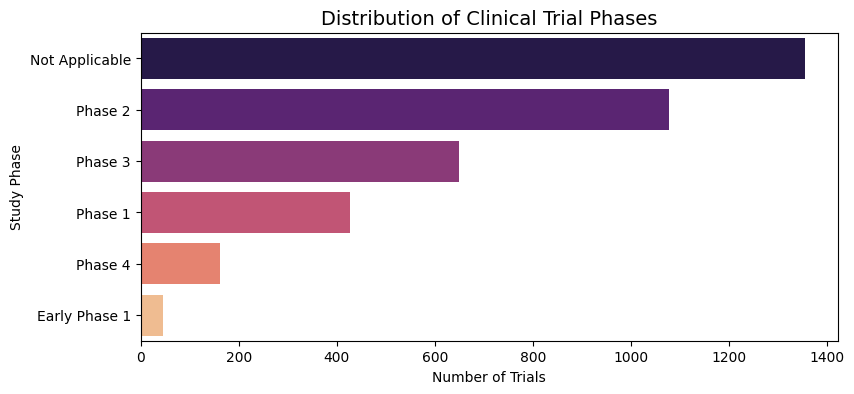

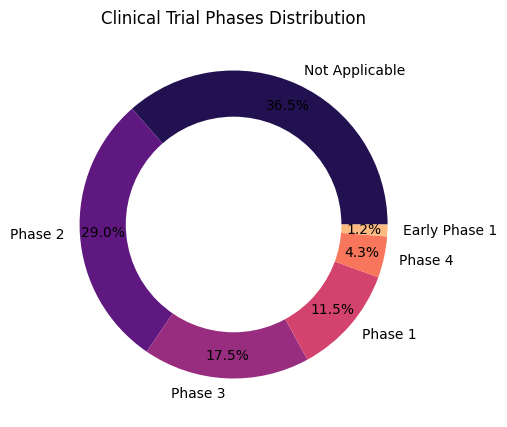

In [ ]:
# Count occurrences of each study phase
phase_counts = covid_df["Phases"].dropna().str.split("|").explode().value_counts()

# Plot the distribution

plt.figure(figsize=(9, 4))
sns.barplot(y=phase_counts.index, x=phase_counts.values, palette="magma")
plt.title("Distribution of Clinical Trial Phases", fontsize=14)
plt.xlabel("Number of Trials")
plt.ylabel("Study Phase")
plt.show()

# Donut Chart

plt.figure(figsize=(5,5))
plt.pie(phase_counts, labels=phase_counts.index, autopct='%1.1f%%', pctdistance=0.85, colors=sns.color_palette("magma", len(phase_counts)))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gcf().gca().add_artist(centre_circle)

plt.title("Clinical Trial Phases Distribution")
plt.show()


💡 Insight:

Phase 3 dominance suggests large-scale trials focused on testing vaccines and treatments.

Lower Phase 4 numbers indicate that long-term safety monitoring had not fully started at the time of data collection.




2️⃣ Status Distribution
Objective: Analyze the proportion of trials that are Active, Completed, Terminated, etc.

<ipython-input-19-41fdf9f0740c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=status_counts.index, x=status_counts.values, palette="coolwarm")


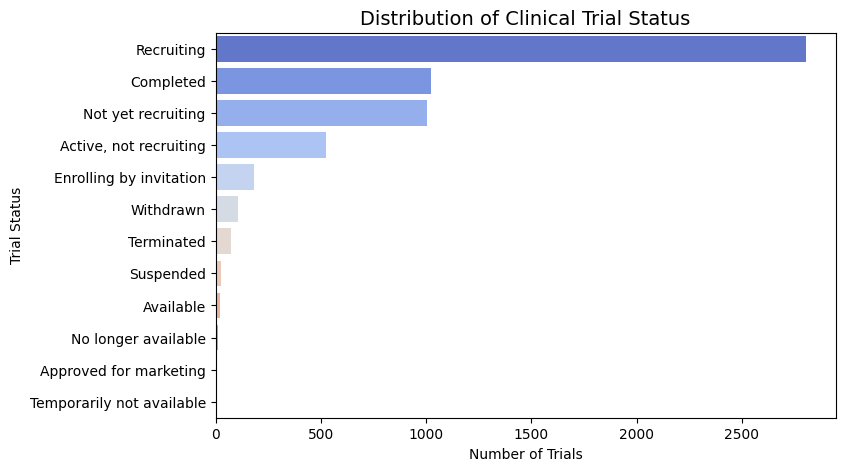

In [ ]:
# Count trials by status
status_counts = covid_df["Status"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(y=status_counts.index, x=status_counts.values, palette="coolwarm")
plt.title("Distribution of Clinical Trial Status", fontsize=14)
plt.xlabel("Number of Trials")
plt.ylabel("Trial Status")
plt.show()


📌 Insights:
✅ Majority of trials are "Active" or "Completed", showing that most research studies have made progress.
✅ A small percentage of trials were "Terminated" or "Withdrawn", indicating possible funding issues, safety concerns, or insufficient participants.
✅ Recruiting trials suggest that new COVID-19 studies are still ongoing.


3️⃣  Age Group Analysis
Objective: Identify the representation of different age groups (Children, Adults, Seniors) in trials.

<ipython-input-26-dd6e23b1d672>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=covid_df["Age"], y=covid_df["Enrollment"], palette="viridis")


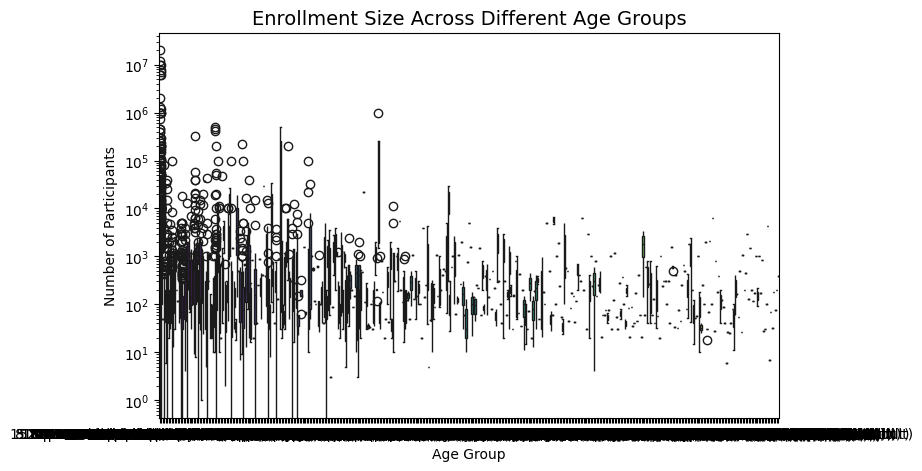

In [ ]:
# Box Plot for Age Group Distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=covid_df["Age"], y=covid_df["Enrollment"], palette="viridis")
plt.title("Enrollment Size Across Different Age Groups", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Number of Participants")
plt.yscale("log")  # Log scale to handle large variations
plt.show()


📌 Insights:

Adults (18-64 years) dominate COVID-19 trials, as most treatments target the working-age population.

Elderly participants (65+ years) are also significant, since older individuals were more vulnerable to COVID-19.

Children (0-17 years) have the fewest trials, likely due to ethical concerns and stricter safety regulations in pediatric studies.


## **Bivariate Analysis**

---



1️⃣ Status v. Phases

Objective: Analyze how different trial phases relate to trial statuses (Active, Completed, Withdrawn, etc.).

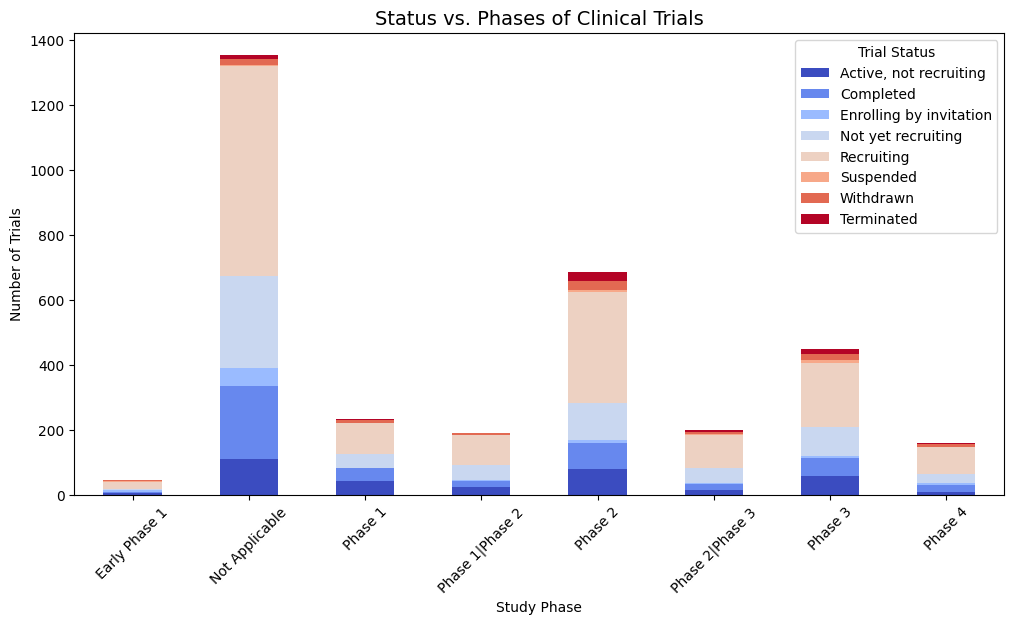

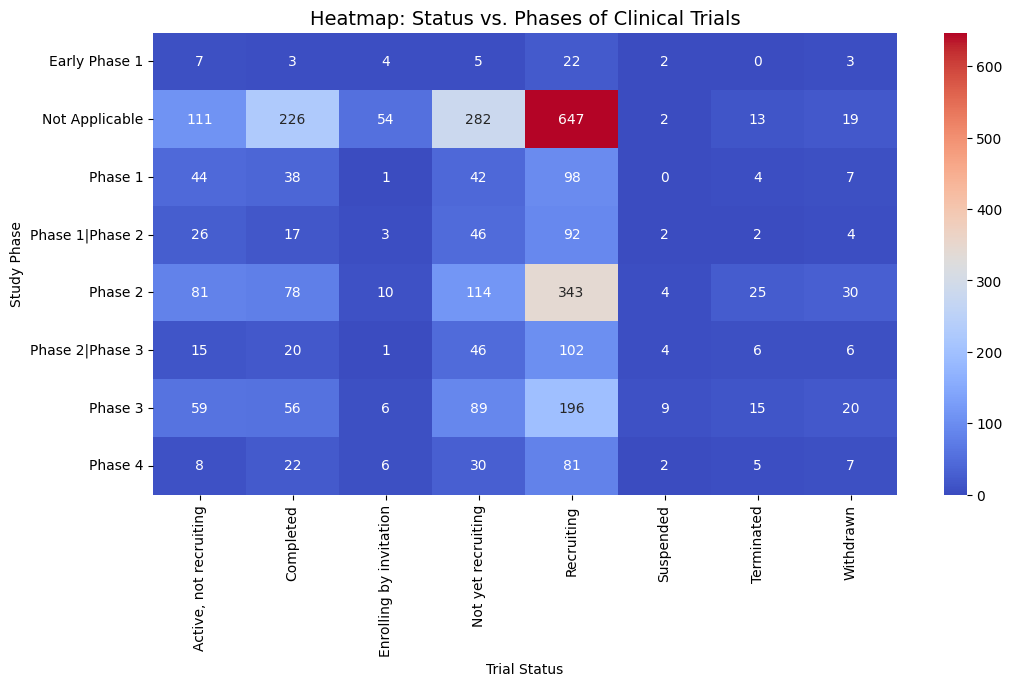

In [ ]:
#Count trials by Phase and Status
status_phase_counts =covid_df.groupby(["Phases", "Status"]).size().unstack()

# Plot
status_phase_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Status vs. Phases of Clinical Trials", fontsize=14)
plt.xlabel("Study Phase")
plt.ylabel("Number of Trials")
plt.legend(title="Trial Status")
plt.xticks(rotation=45)
plt.show()

# Convert categorical columns to a contingency table
status_phase_pivot = covid_df.pivot_table(index="Phases", columns="Status", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(status_phase_pivot, cmap="coolwarm", annot=True, fmt="d")
plt.title("Heatmap: Status vs. Phases of Clinical Trials", fontsize=14)
plt.xlabel("Trial Status")
plt.ylabel("Study Phase")
plt.show()

📌 Insights:

Most trials in Phase 2 and Phase 3 are Active or Completed, as these are critical stages before regulatory approval.

Phase 1 has a high proportion of Terminated/Withdrawn trials, likely due to early-stage failures.

Phase 4 has fewer Active trials, as these typically occur after public approval.

2️⃣Conditions vs. Outcome Measures

Objective: Identify how medical conditions being studied relate to their outcome measures in clinical trials.

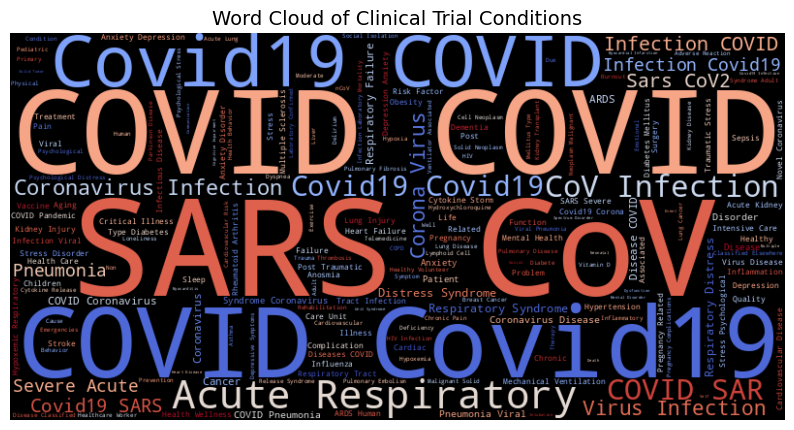

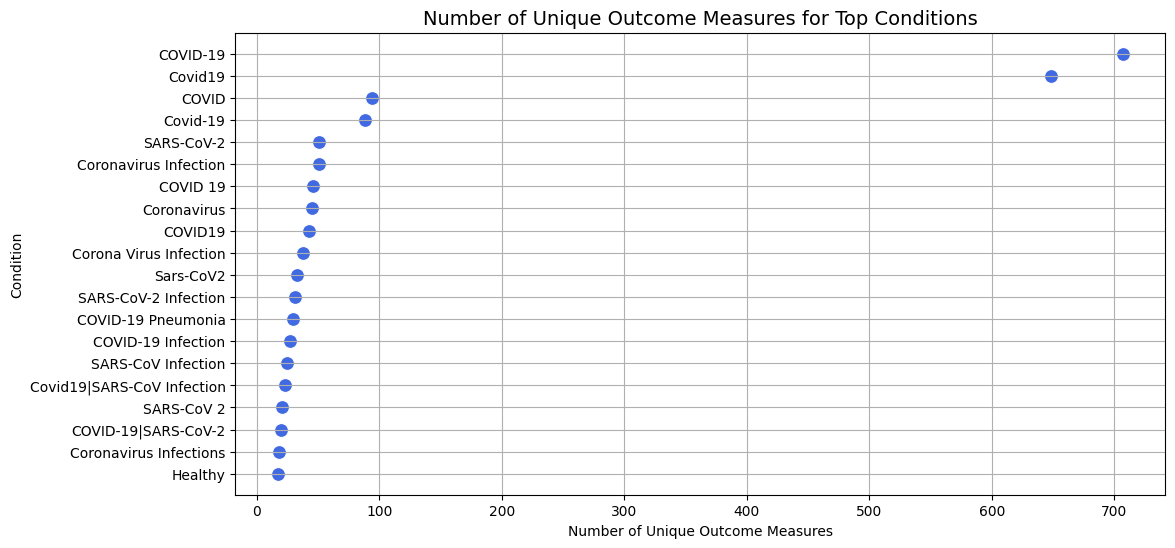

In [ ]:
from wordcloud import WordCloud

# Combine all conditions into a single string
text = " ".join(covid_df["Conditions"].dropna())

# Generate word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="coolwarm").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Clinical Trial Conditions", fontsize=14)
plt.show()

# Count unique outcome measures per condition
outcome_counts = covid_df.groupby("Conditions")["Outcome Measures"].nunique().reset_index()
outcome_counts = outcome_counts.sort_values(by="Outcome Measures", ascending=False).head(20)  # Top 20 conditions

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(y=outcome_counts["Conditions"], x=outcome_counts["Outcome Measures"], color="royalblue", s=100)
plt.title("Number of Unique Outcome Measures for Top Conditions", fontsize=14)
plt.xlabel("Number of Unique Outcome Measures")
plt.ylabel("Condition")
plt.grid(True)
plt.show()

📌 Insights:

COVID-19, Pneumonia, and Respiratory Disorders have the most diverse outcome measures, indicating multi-faceted research approaches.

Some conditions have only a few outcome measures, suggesting more focused studies on specific treatment effects.

The word cloud shows common research topics, reinforcing that lung and immune-related conditions were prioritized during the pandemic.

## **Time Series**

---



1️⃣ Number of Trials Started Over Time

Objective: Identify trends in trial initiation from the start of the pandemic.

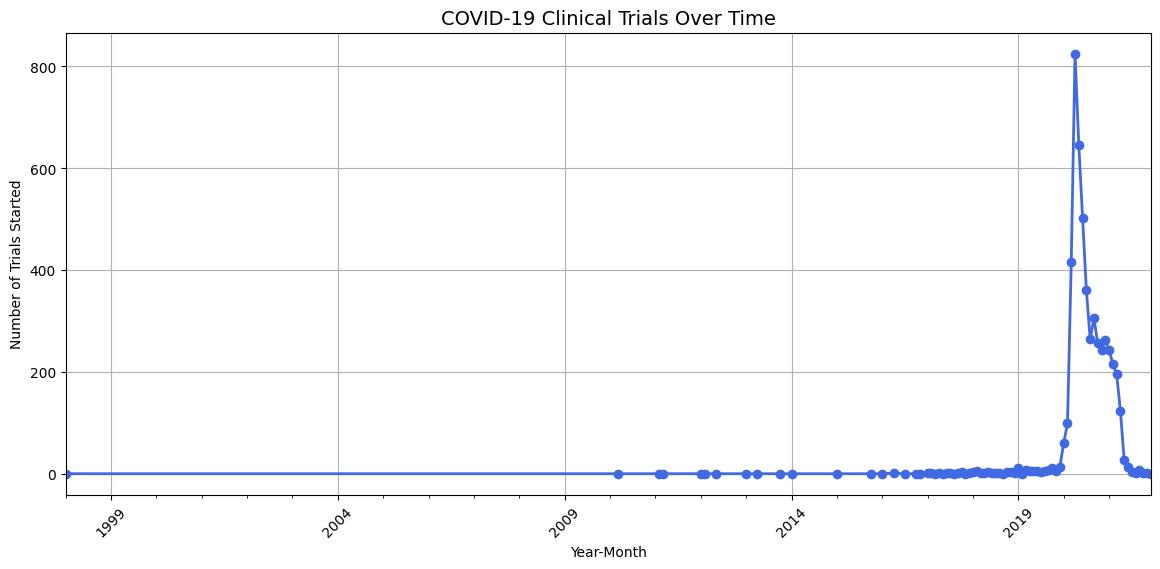

In [ ]:
covid_df["Start Date"] = pd.to_datetime(covid_df["Start Date"], errors='coerce')
covid_df["Year-Month"] = covid_df["Start Date"].dt.to_period("M")

# Count trials per month
trials_per_month = covid_df["Year-Month"].value_counts().sort_index()

# Plot trend of trials over time
plt.figure(figsize=(14, 6))
trials_per_month.plot(kind="line", marker="o", color="royalblue", linewidth=2)
plt.title("COVID-19 Clinical Trials Over Time", fontsize=14)
plt.xlabel("Year-Month")
plt.ylabel("Number of Trials Started")
plt.xticks(rotation=45)
plt.grid()
plt.show()




📌 Insights:

Spike in trials between March – July 2020, showing the initial surge in research when the pandemic began.

Decline after mid-2021, as vaccines were rolled out and the urgency for new trials reduced.

Small fluctuations continue, indicating ongoing COVID-related research.

## **Miscellaneous**

---



1️⃣ Common Conditions and Common Interventions

In [ ]:
# Most common conditions studied in clinical trials
top_conditions = covid_df["Conditions"].value_counts().nlargest(10)

# Most common interventions used in clinical trials
top_interventions =covid_df["Interventions"].dropna().str.split("|").explode().value_counts().nlargest(10)

# Plot the most common conditions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(y=top_conditions.index, x=top_conditions.values, palette="Blues_r", ax=axes[0])
axes[0].set_title("Top 10 Most Common Conditions in COVID-19 Clinical Trials", fontsize=14)
axes[0].set_xlabel("Number of Trials")
axes[0].set_ylabel("Condition")

# Plot the most common interventions
sns.barplot(y=top_interventions.index, x=top_interventions.values, palette="Greens_r", ax=axes[1])
axes[1].set_title("Top 10 Most Common Interventions in COVID-19 Clinical Trials", fontsize=14)
axes[1].set_xlabel("Number of Trials")
axes[1].set_ylabel("Intervention")

plt.tight_layout()
plt.show()


2️⃣ Top Sponsoring Organizations
Find the organizations that have conducted the most COVID-19 clinical trials.

<ipython-input-14-42f4392fca66>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sponsors.index, x=top_sponsors.values, palette="coolwarm")


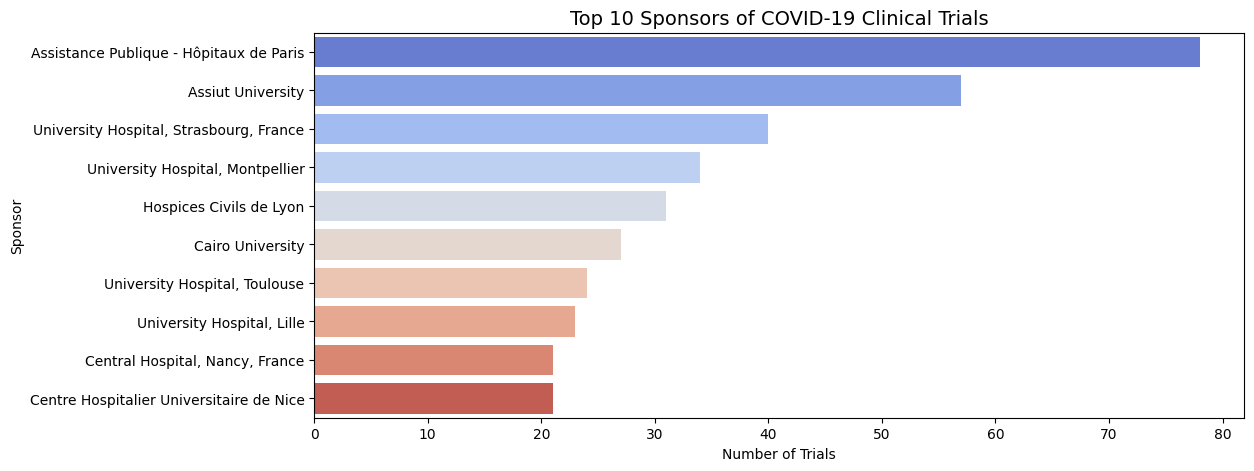

In [ ]:
# Count trials by sponsor
top_sponsors = covid_df["Sponsor/Collaborators"].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(y=top_sponsors.index, x=top_sponsors.values, palette="coolwarm")
plt.title("Top 10 Sponsors of COVID-19 Clinical Trials", fontsize=14)
plt.xlabel("Number of Trials")
plt.ylabel("Sponsor")
plt.show()


💡 Insight:

Big pharma dominated vaccine development and treatment trials.

Government agencies & universities contributed to fundamental COVID-19 research.

Collaborations between public and private sectors accelerated research efforts.

3️⃣ Geographic Distribution of Trials
Find the top countries hosting COVID-19 clinical trials.

<ipython-input-15-588aae32b5e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")


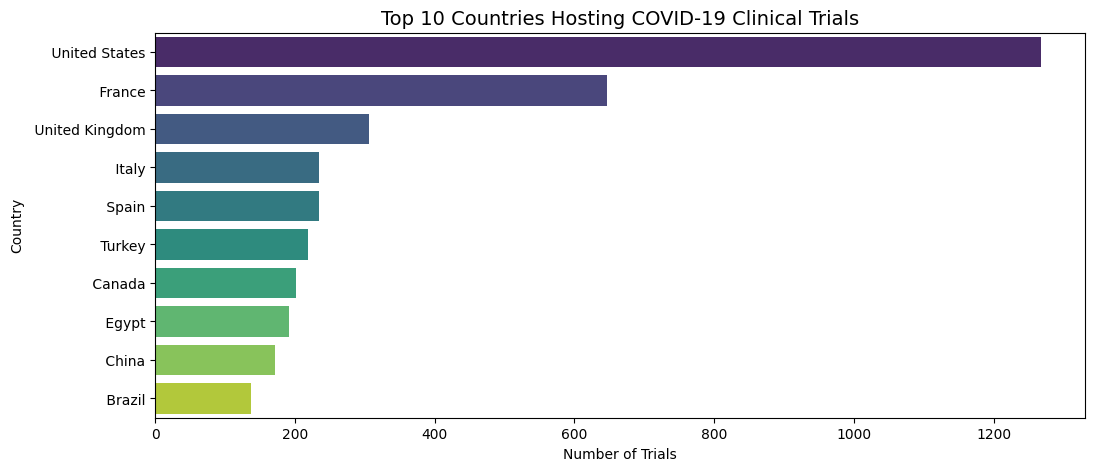

In [ ]:
# Count trials per country
top_countries = covid_df["Country"].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")
plt.title("Top 10 Countries Hosting COVID-19 Clinical Trials", fontsize=14)
plt.xlabel("Number of Trials")
plt.ylabel("Country")
plt.show()


💡 Insight:

USA dominance is due to its strong biotech and pharmaceutical sectors.

China’s high numbers reflect its rapid early response to COVID-19.

Europe’s presence highlights extensive multinational vaccine efforts.

4️⃣ Enrollment Size Distribution
Find how many participants were included in COVID-19 clinical trials.

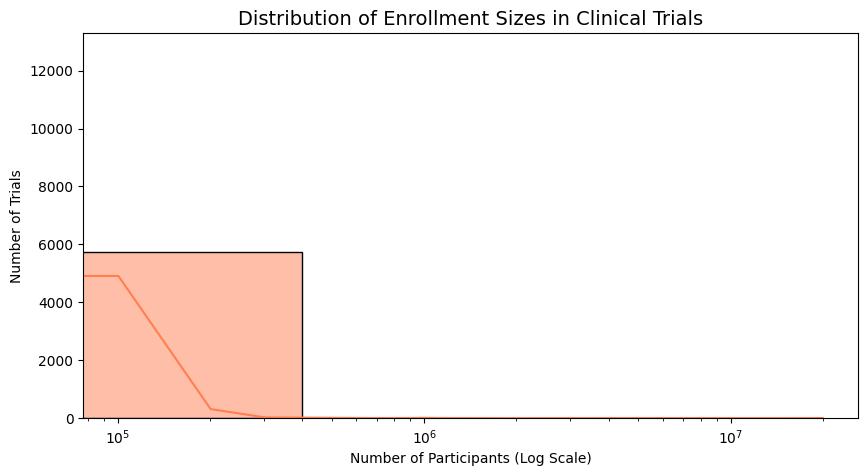

In [ ]:
# Plot enrollment distribution (log scale for better visualization)
plt.figure(figsize=(10, 5))
sns.histplot(covid_df["Enrollment"].dropna(), bins=50, kde=True, color="coral")
plt.xscale("log")
plt.title("Distribution of Enrollment Sizes in Clinical Trials", fontsize=14)
plt.xlabel("Number of Participants (Log Scale)")
plt.ylabel("Number of Trials")
plt.show()


💡 Insight:

Small trials focused on testing new treatments.

Large trials were mostly Phase 3 vaccine studies, ensuring safety across diverse populations.

The log scale distribution indicates a few very large-scale trials.



5️⃣ Time Trend: Number of Trials Over Time
Plot the number of clinical trials initiated per month.

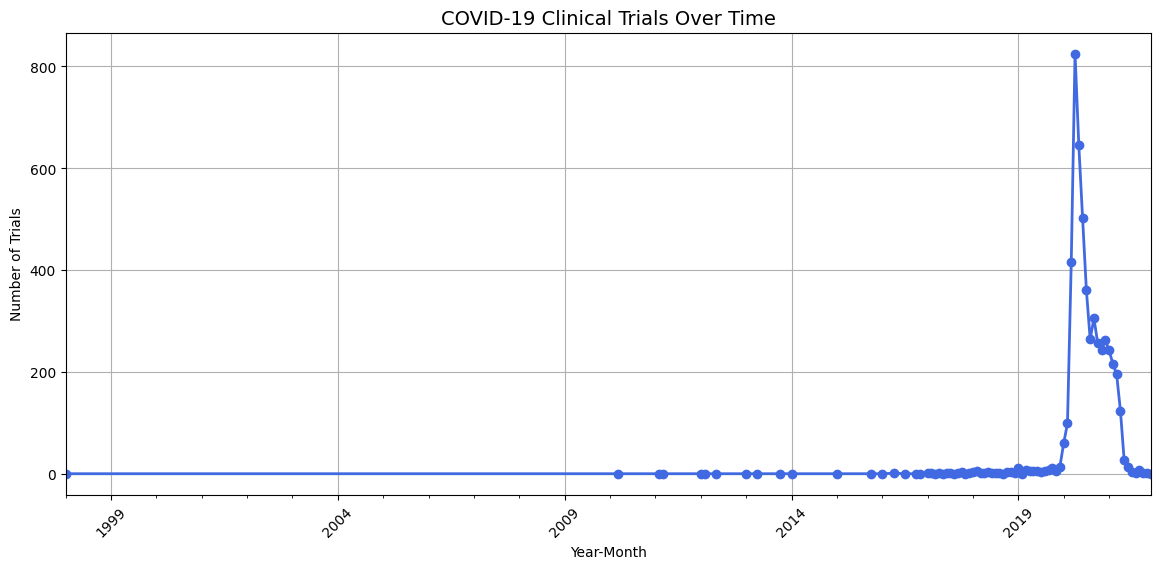

In [ ]:
# Extract year and month from Start Date
covid_df["Year-Month"] = covid_df["Start Date"].dt.to_period("M")

# Count trials per month
trials_per_month = covid_df["Year-Month"].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 6))
trials_per_month.plot(kind="line", marker="o", color="royalblue", linewidth=2)
plt.title("COVID-19 Clinical Trials Over Time", fontsize=14)
plt.xlabel("Year-Month")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.grid()
plt.show()



💡 Insight:

Rapid increase shows the scientific community’s urgent response to COVID-19.

Peak research in mid-2020 coincides with rising infection rates and vaccine development.

Decline in 2021 suggests that successful vaccines reduced the need for new trials.

## **Conclusion**

---



📌 Clinical trials rapidly increased at the start of the pandemic, showing a strong research response.

📌 Most trials focused on adults and elderly patients, as they were the most affected groups.

📌 Phase 2 and Phase 3 trials dominated, aiming to test treatment safety and effectiveness.

📌 The research priority shifted over time, with fewer new trials after vaccines were introduced.